<a href="https://colab.research.google.com/github/Madusha27301/codealpha_tasks/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 — Data Visualization**

## Step 1: Upload dataset

In [ ]:
# Step 1: Upload dataset (Google Colab)
import pandas as pd
from google.colab import files

uploaded = files.upload()  # upload your CSV file
df = pd.read_csv(list(uploaded.keys())[0])  # load uploaded file into DataFrame
df.head()


Saving synthetic_fraud_dataset.csv to synthetic_fraud_dataset.csv


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


## Step 2: Basic Setup & Libraries

In [ ]:
# Step 2: Import full libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 120
sns.set(style="whitegrid", font_scale=1)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Dataset Loaded Successfully!
Shape: (10000, 10)


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


## Step 3: Check Dataset Structure

In [ ]:
# Step 3: Structural overview
df.info()

print("\nSummary Statistics:")
display(df.describe(include="all"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB

Summary Statistics:


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,4,5,6,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,POS,Food,US,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2568,2023,2050,NaN,NaN,NaN,NaN
mean,4999.50000,500.058700,178.142763,NaN,NaN,NaN,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,NaN,NaN,NaN,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,NaN,NaN,NaN,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,NaN,NaN,NaN,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,NaN,NaN,NaN,19.000000,0.234939,0.236968,0.000000


## Step 4: Identify Column Types Automatically

In [ ]:
# Step 4: Detect numeric, categorical, datetime columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = []

# Try converting string-like dates
for col in object_cols:
    try:
        temp = pd.to_datetime(df[col], errors='coerce')
        if temp.notna().sum() > 0.1 * len(df):
            datetime_cols.append(col)
            df[col] = temp
    except:
        pass

object_cols = [c for c in object_cols if c not in datetime_cols]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", object_cols)
print("Datetime Columns:", datetime_cols)


Numeric Columns: ['transaction_id', 'user_id', 'amount', 'hour', 'device_risk_score', 'ip_risk_score', 'is_fraud']
Categorical Columns: ['transaction_type', 'merchant_category', 'country']
Datetime Columns: []


/tmp/ipython-input-442642597.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-442642597.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-442642597.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(df[col], errors='coerce')


## Step 5: Univariate Analysis (Distributions & Counts)

```
# This is formatted as code
```



### Numeric Columns — Histograms + KDE

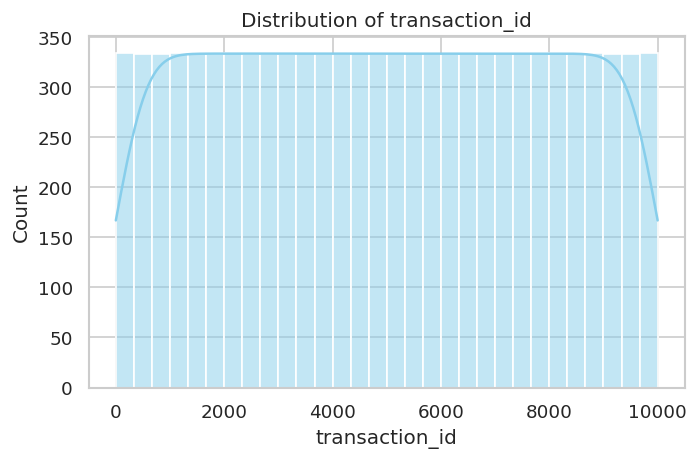

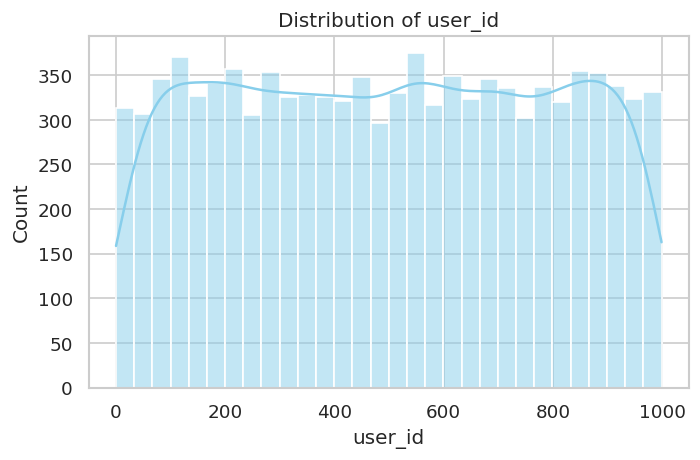

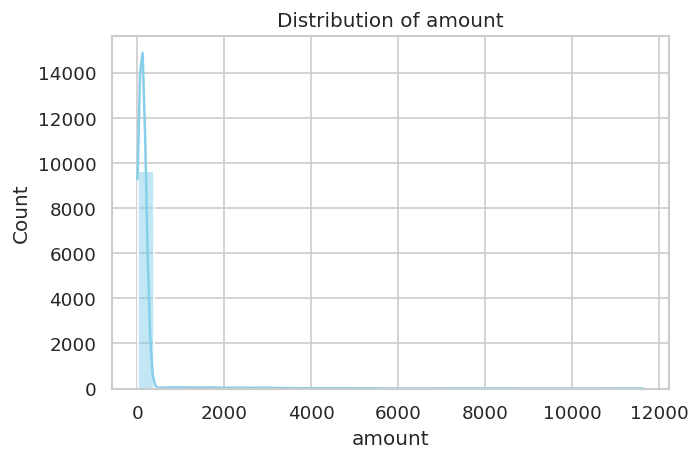

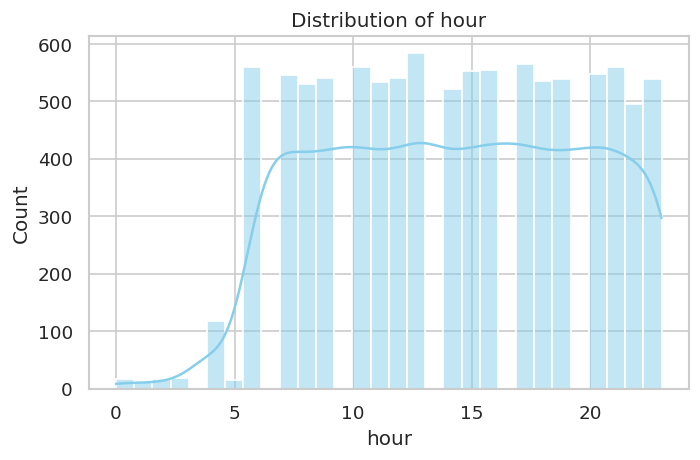

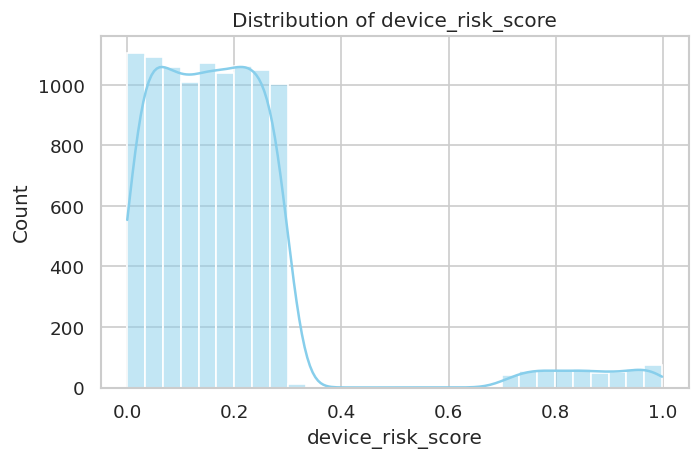

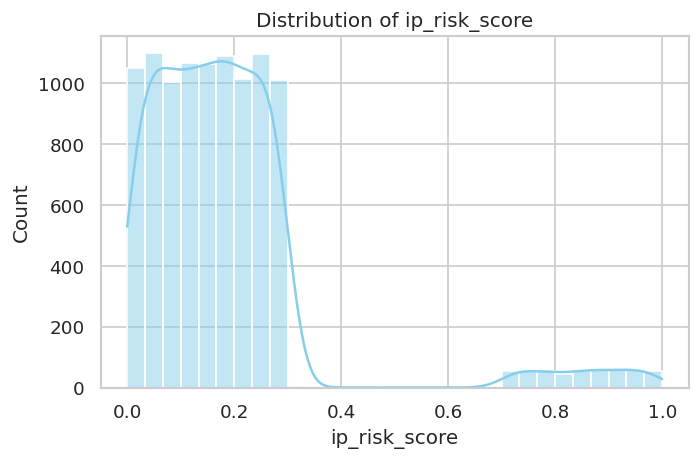

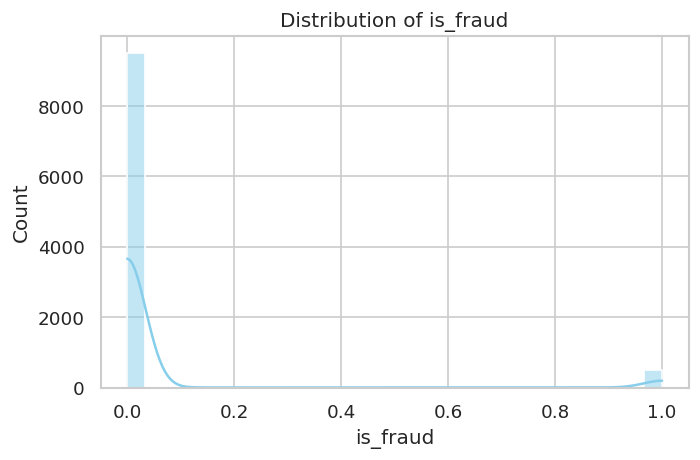

In [ ]:
# Step 5: Numeric feature distributions
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### Categorical Columns — Bar Plots

/tmp/ipython-input-3841150346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


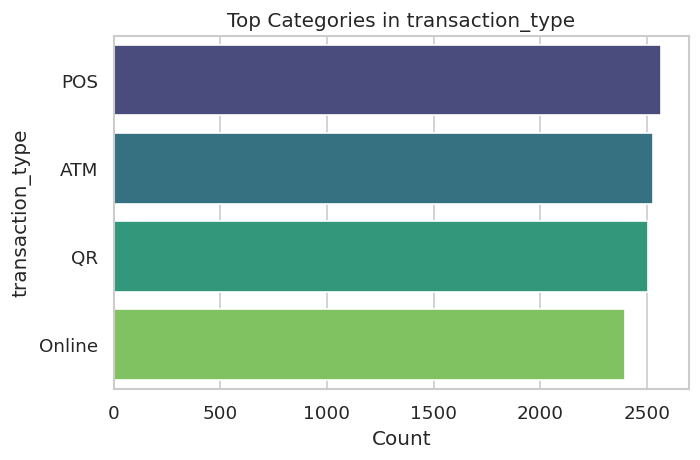

/tmp/ipython-input-3841150346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


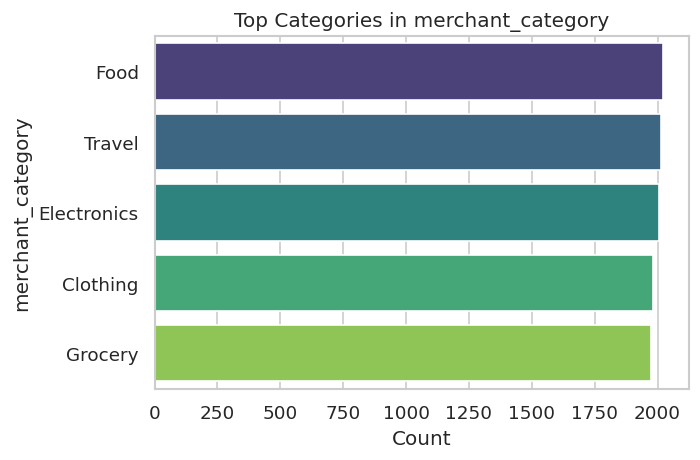

/tmp/ipython-input-3841150346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vc.values, y=vc.index, palette="viridis")


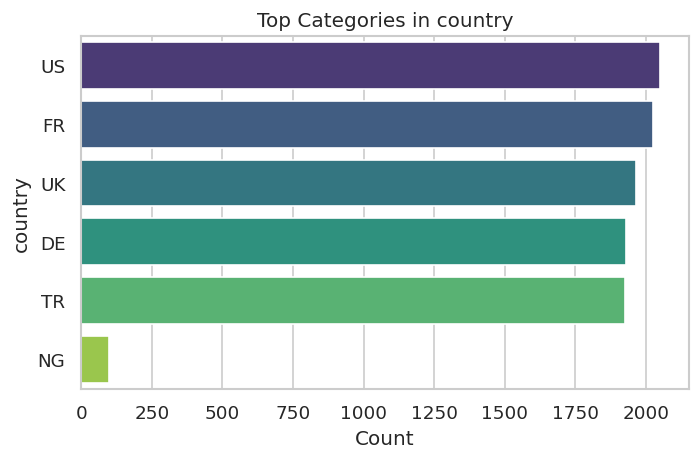

In [ ]:
# Step 5b: Categorical feature counts
for col in object_cols:
    plt.figure(figsize=(6,4))
    vc = df[col].value_counts().head(10)  # top 10 categories
    sns.barplot(x=vc.values, y=vc.index, palette="viridis")
    plt.title(f"Top Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Step 6: Boxplots for Outlier Detection

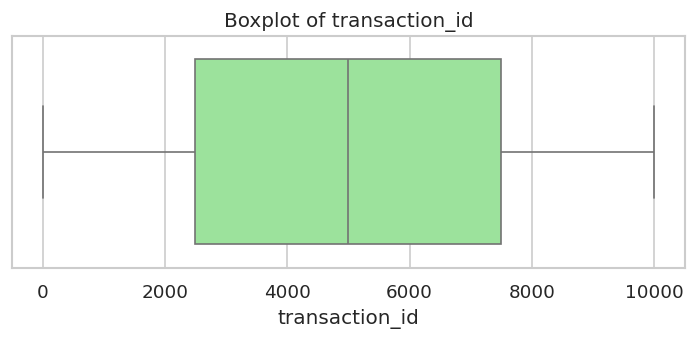

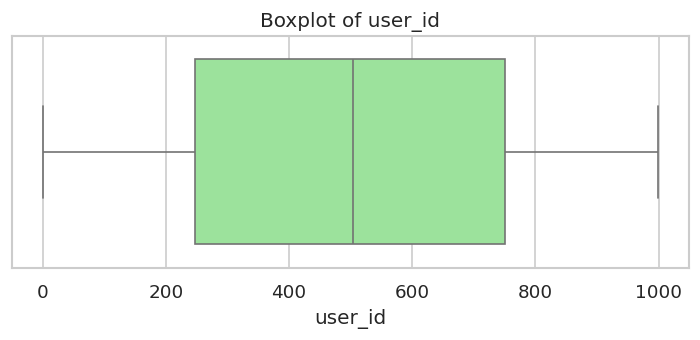

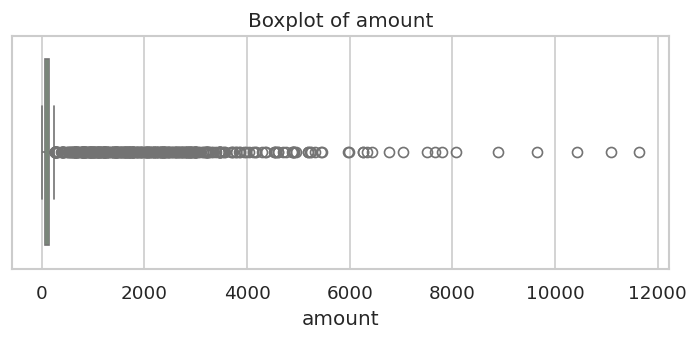

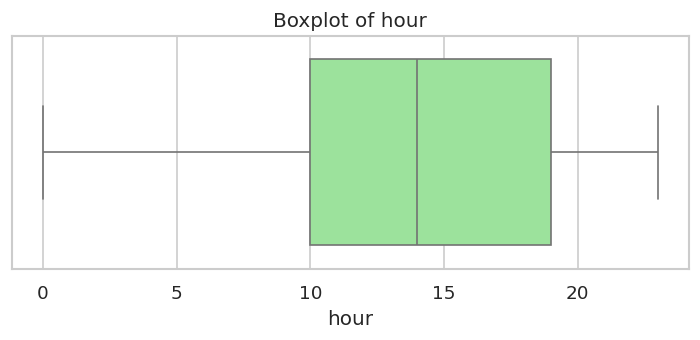

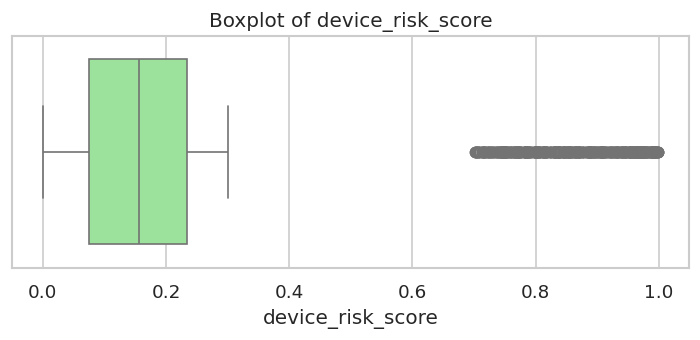

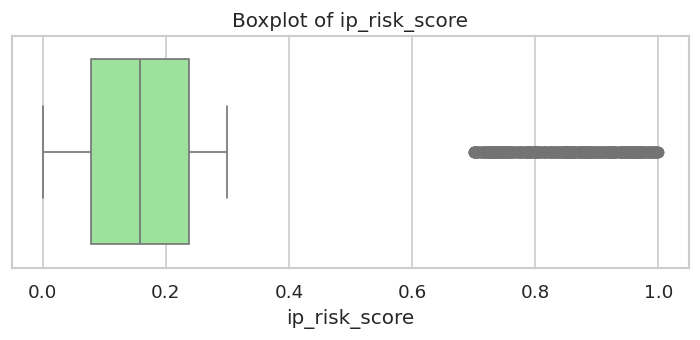

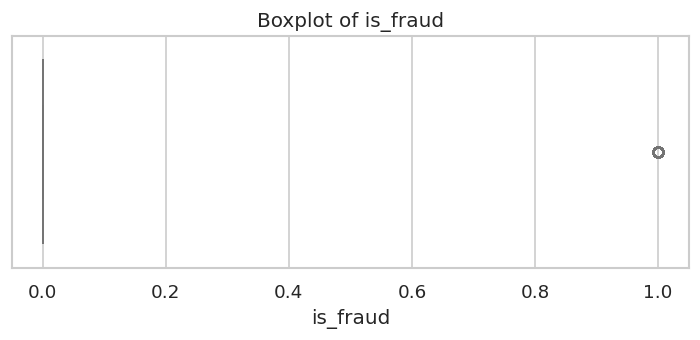

In [ ]:
# Step 6: Boxplots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


## Step 7: Correlation Heatmap (Numeric Columns)

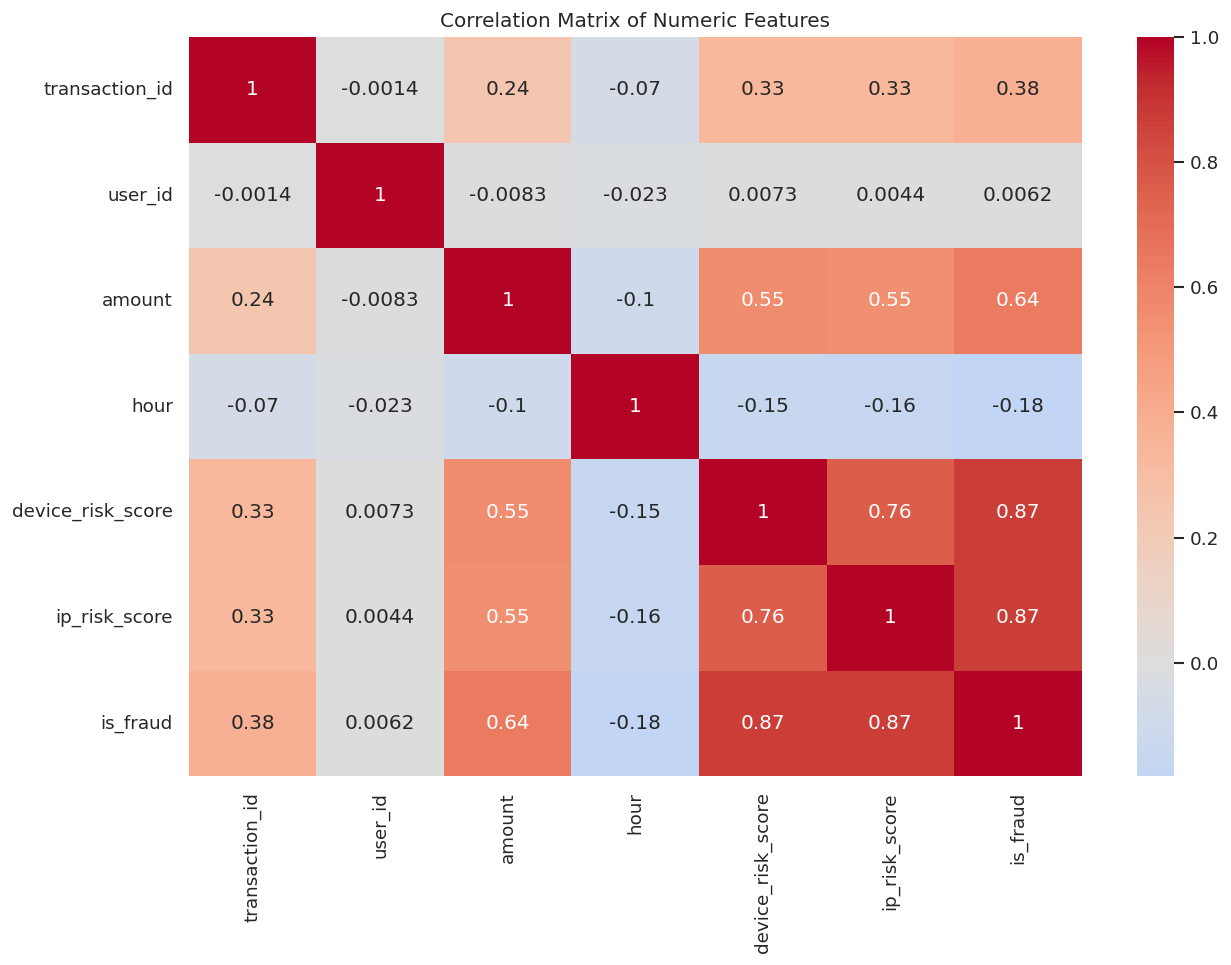

is_fraud       device_risk_score    0.871989
               ip_risk_score        0.870738
ip_risk_score  device_risk_score    0.757978
dtype: float64

In [ ]:
# Step 7: Correlation heatmap
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Optional: print highly correlated pairs (abs > 0.7)
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr < 1) & (high_corr >= 0.7)].drop_duplicates()
display(high_corr)


## Step 8: Bivariate Analysis

### Numeric vs Numeric — Scatterplots

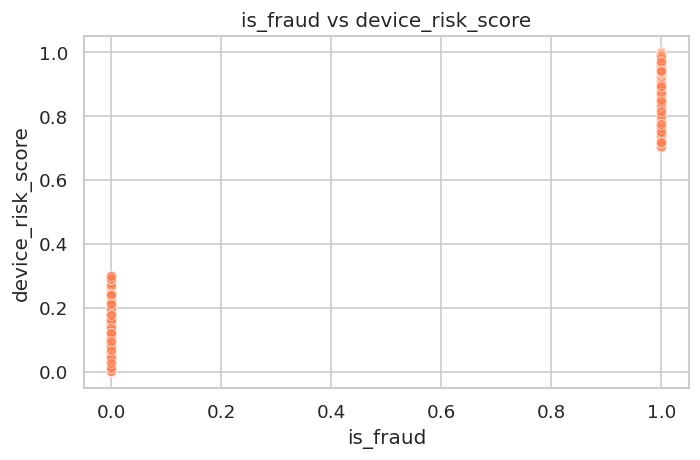

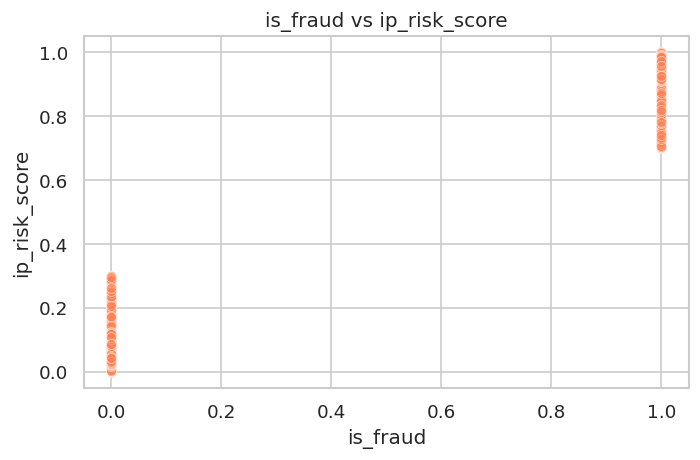

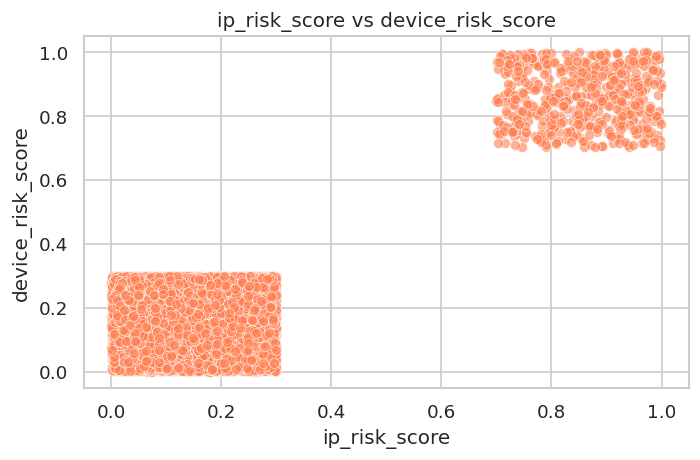

In [ ]:
# Step 8: Scatterplots for top correlated numeric pairs
top_pairs = list(high_corr.index[:3])  # pick top 3 correlated pairs
for x, y in top_pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6, color='coral')
    plt.title(f"{x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()


### Numeric vs Categorical — Boxplots / Violin Plots

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


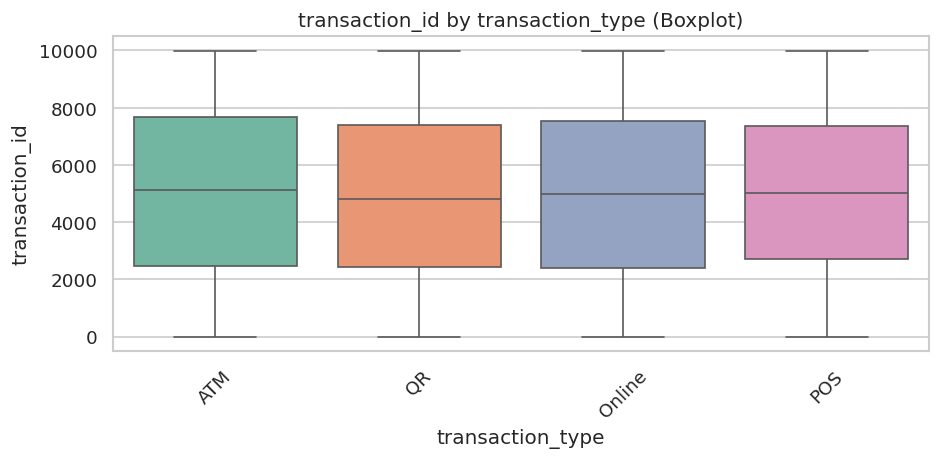

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


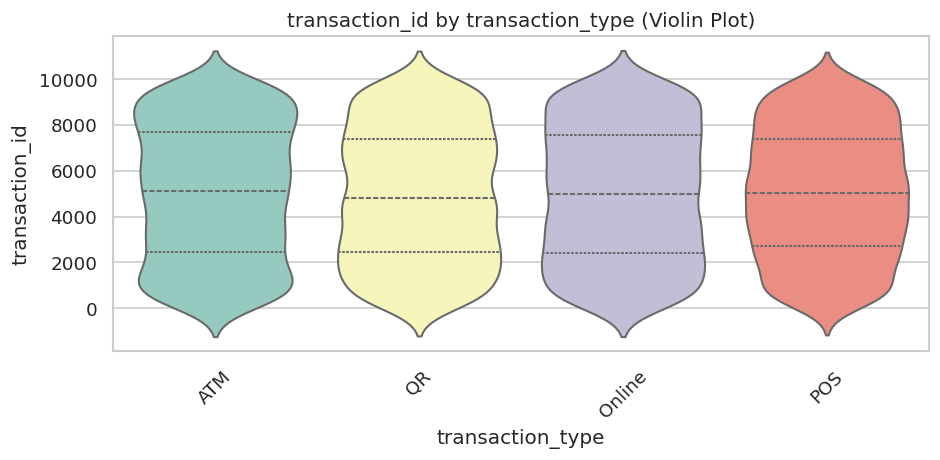

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


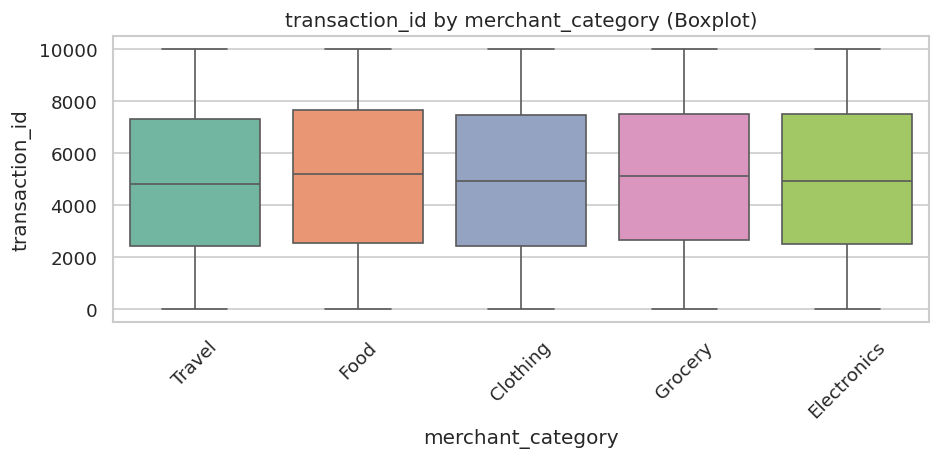

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


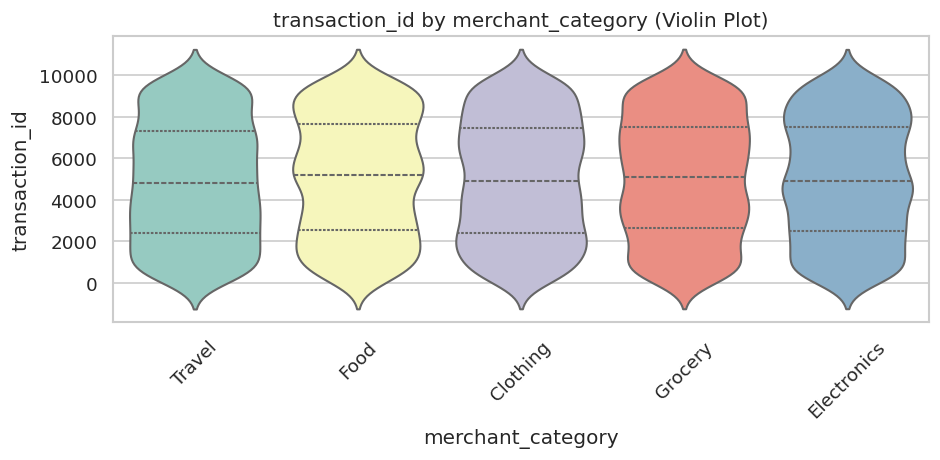

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


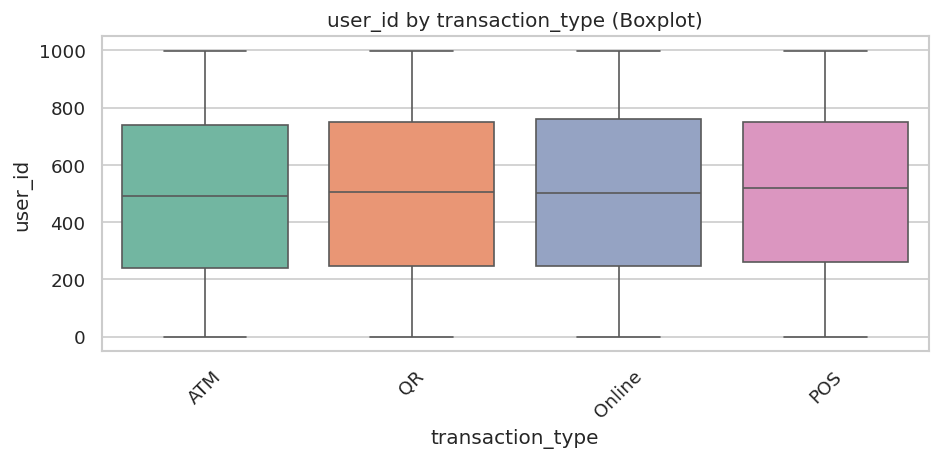

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


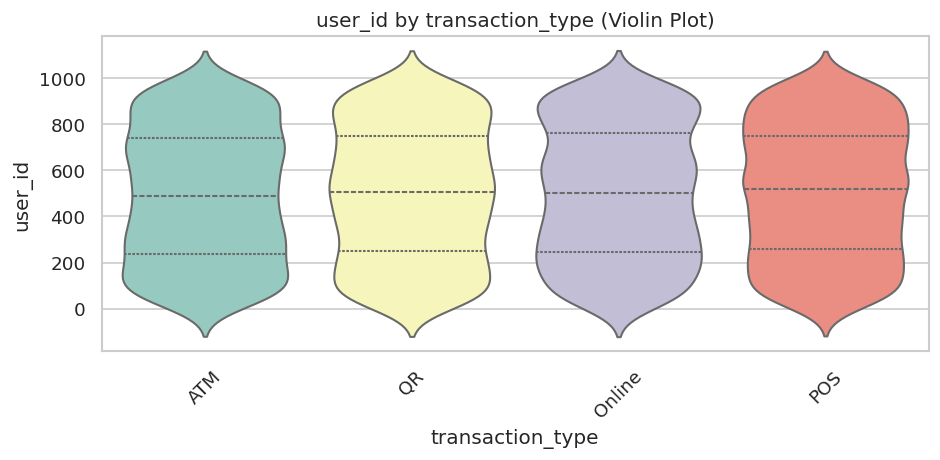

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


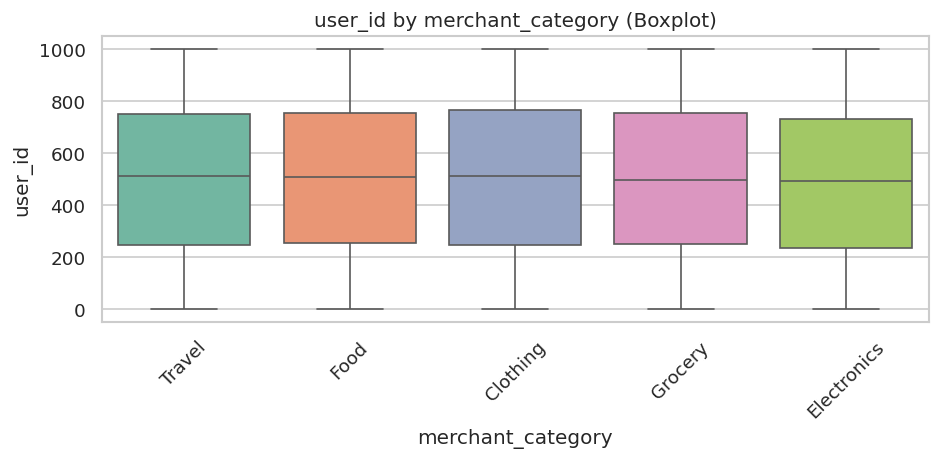

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


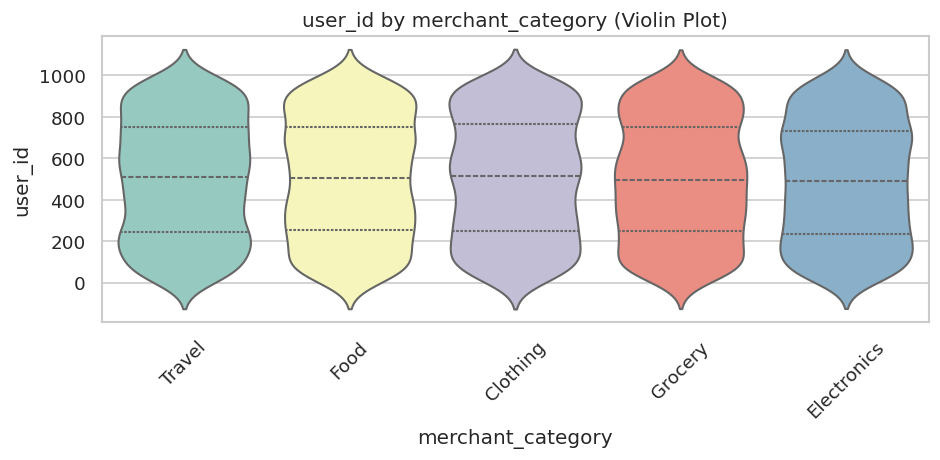

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


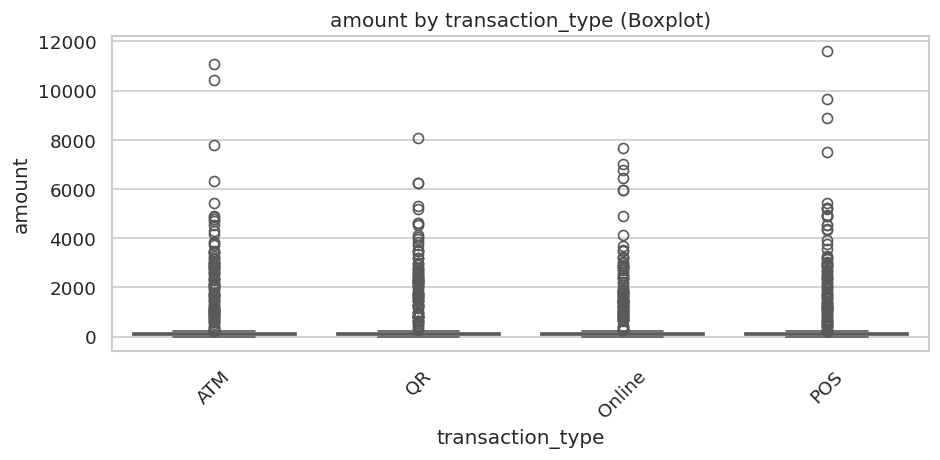

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


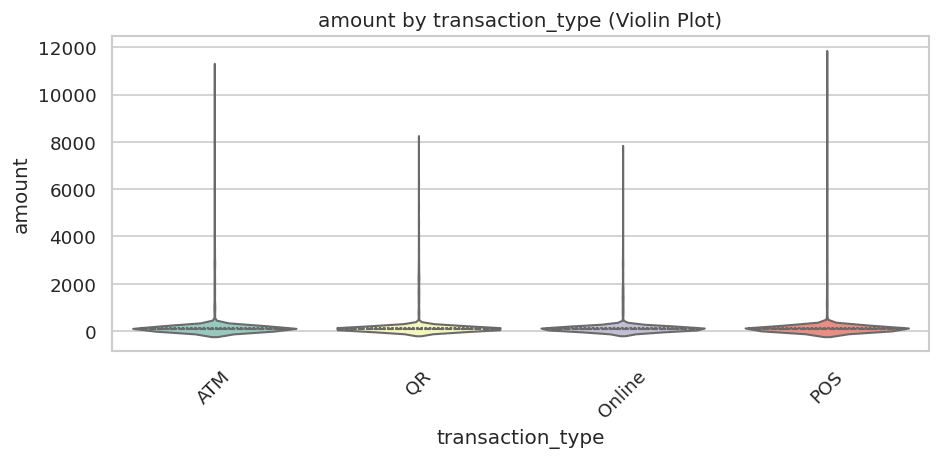

/tmp/ipython-input-2394664350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")


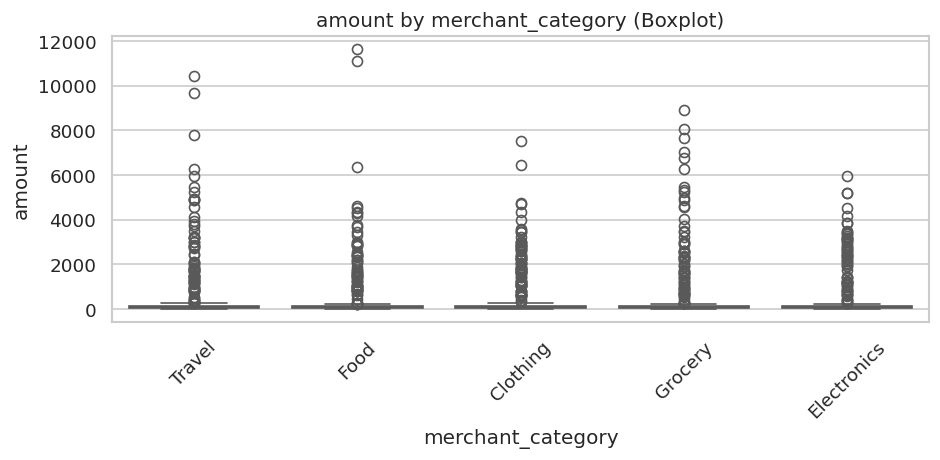

/tmp/ipython-input-2394664350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')


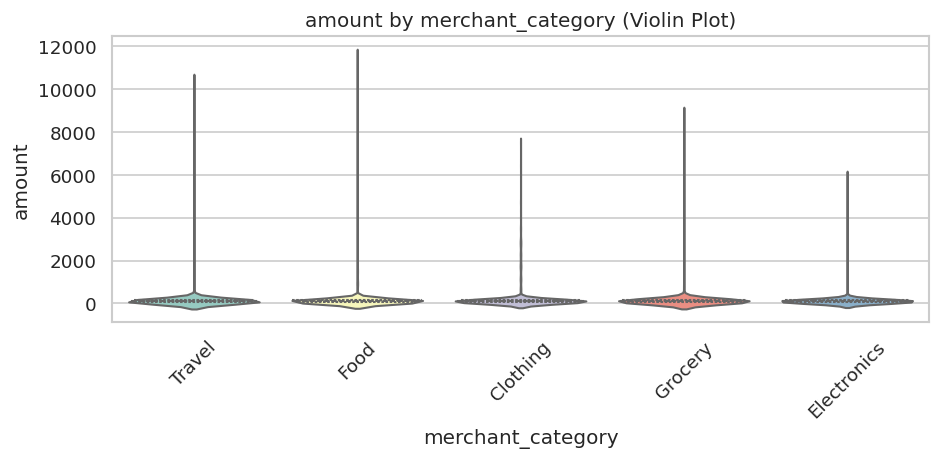

In [ ]:
# Step 8b: Numeric vs Categorical
for num_col in numeric_cols[:3]:
    for cat_col in object_cols[:2]:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df, x=cat_col, y=num_col, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"{num_col} by {cat_col} (Boxplot)")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8,4))
        sns.violinplot(data=df, x=cat_col, y=num_col, palette="Set3", inner='quartile')
        plt.xticks(rotation=45)
        plt.title(f"{num_col} by {cat_col} (Violin Plot)")
        plt.tight_layout()
        plt.show()


## Step 09: Mini Dashboard

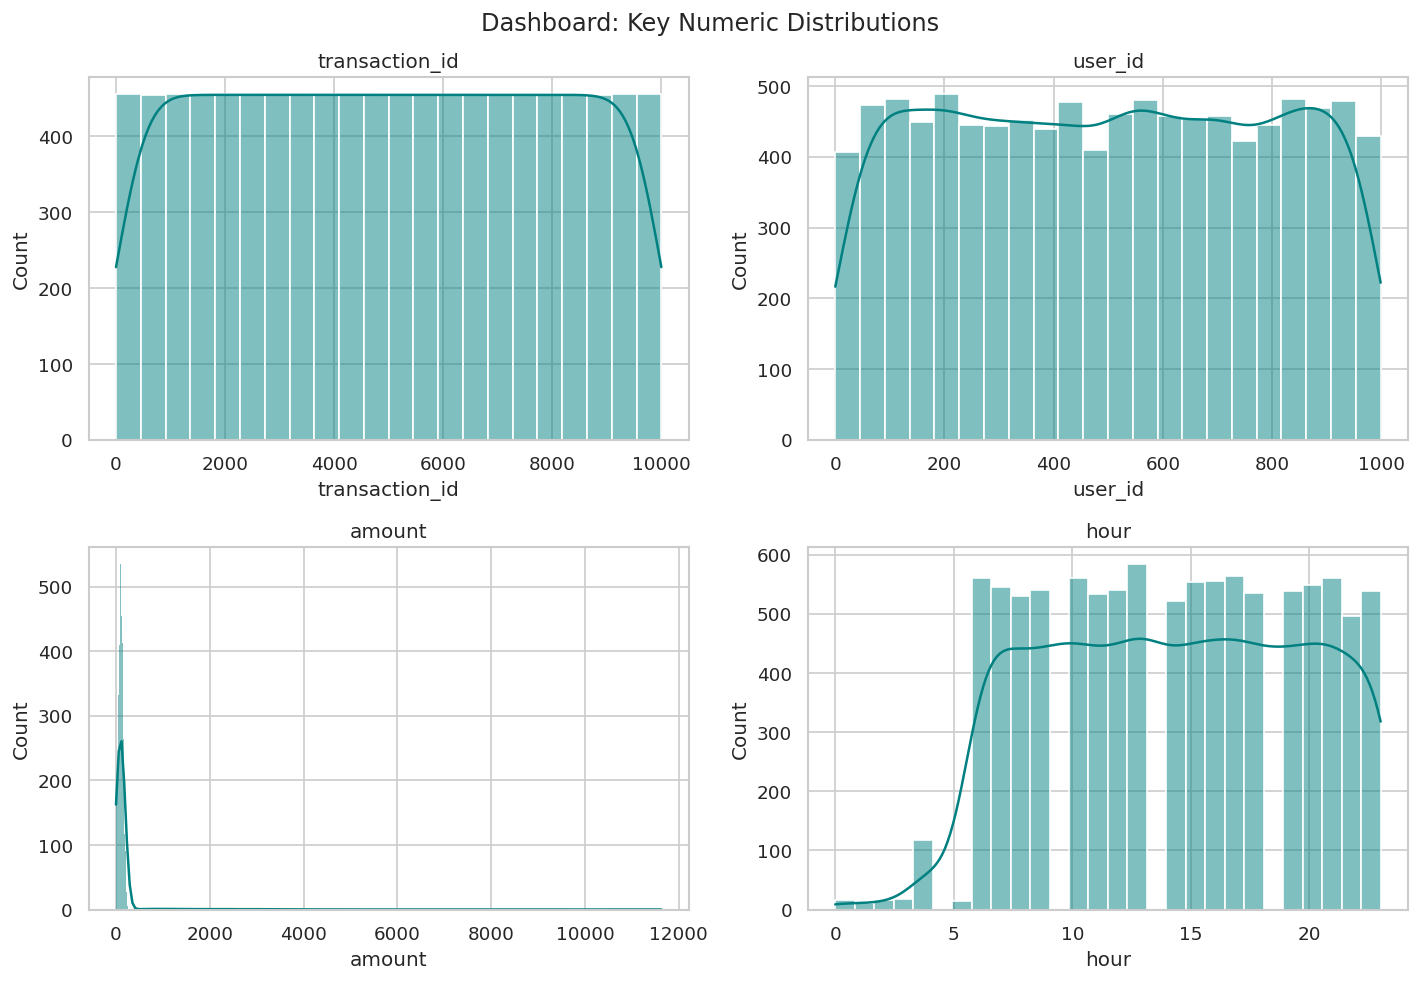

In [ ]:
# Step 10: Dashboard for top numeric features
cols_for_dashboard = numeric_cols[:4]  # top 4 numeric columns
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for i, col in enumerate(cols_for_dashboard):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("Dashboard: Key Numeric Distributions", y=1.02)
plt.show()


## Step 10: Export Cleaned Data for Tableau / Power BI

In [ ]:
# Step 11: Export cleaned dataset
df.to_csv("cleaned_dataset_for_dashboard.csv", index=False)
print("Cleaned dataset saved for Tableau / PowerBI: cleaned_dataset_for_dashboard.csv")


Cleaned dataset saved for Tableau / PowerBI: cleaned_dataset_for_dashboard.csv
